In [1]:
#lets start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"C:\Users\User\Desktop\Akshay project\Data set\avocado.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
data = pd.read_csv(path,encoding = 'ascii')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
data.shape

(18249, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
#Now, there are no missing values in any of the columns, and the first column is unnamed, so we will drop that column.

In [8]:
data = data.drop(columns = ['Unnamed: 0'])
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
#type and region column are in text, so we will convert them into numerical by using label encoder

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lab_enc = LabelEncoder()

In [12]:
data2 = lab_enc.fit_transform(data['type'])

In [13]:
data['type'] = data2

In [14]:
data3 = lab_enc.fit_transform(data['region'])

In [15]:
data['region'] = data3

In [16]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [17]:
data.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,53


In [18]:
#So the column type and region is converted to numerical now.

In [19]:
#Date column is not required since we already have year column in the same data, so we will delete that column(Date)

In [20]:
data = data.drop(columns = ['Date'])
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [28]:
X = data.drop('AveragePrice', axis=1)
y = data['AveragePrice']

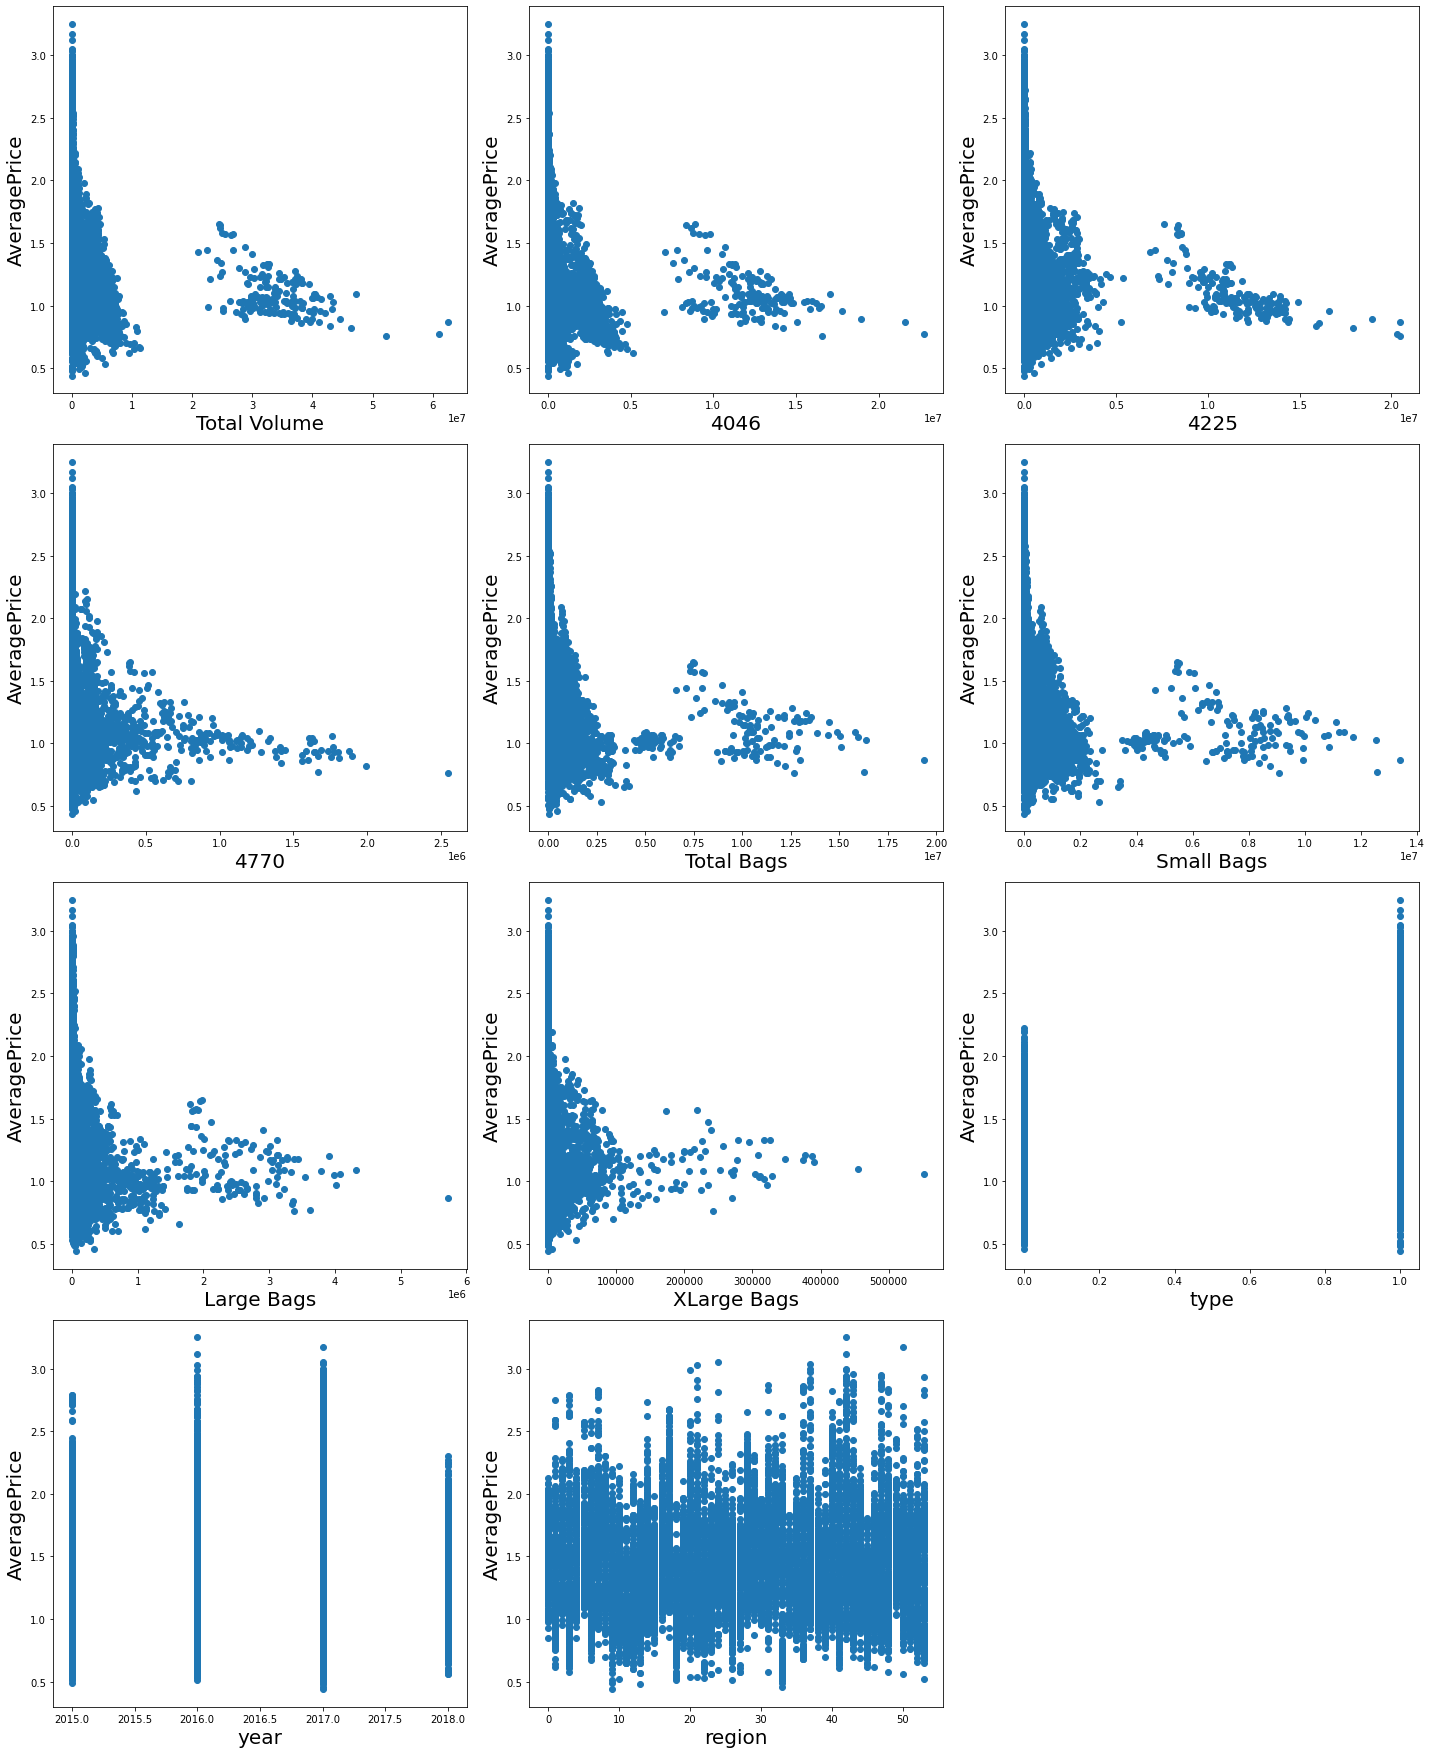

In [29]:
#relationship between feature and label
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15:
        ax =plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('AveragePrice',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [23]:
#From above, we can see that many columns show similar trends with respect to average price and shows collinearity
#Lets check the multicollinearity on dependent variables. Before that we should scale our data.

In [30]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

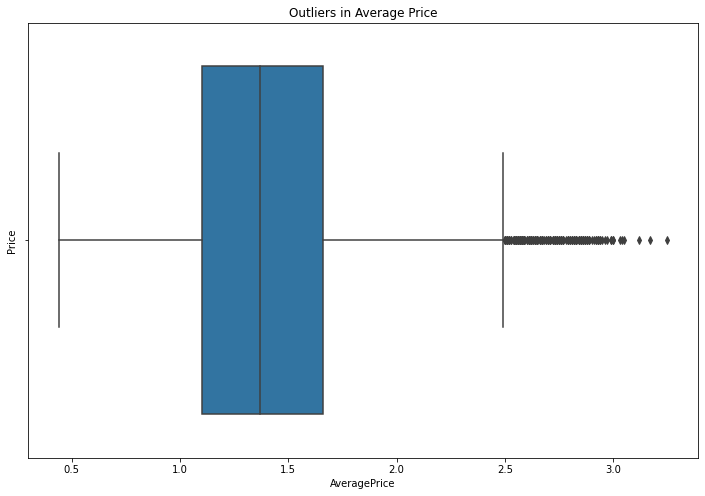

In [31]:
# Check Outliers in Average price.
ax = plt.figure(figsize=(12, 8))

sns.boxplot(x='AveragePrice', data = data)

plt.ylabel("Price")
plt.title("Outliers in Average Price")

plt.show()

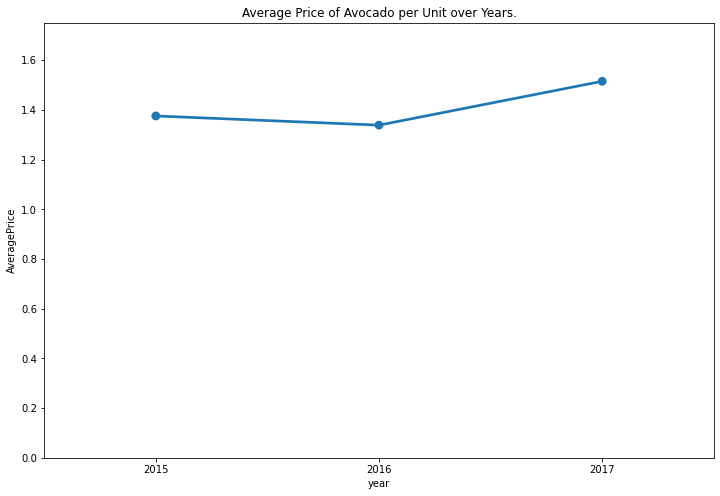

In [32]:
# Yearly AveragePrice of Avocado.
data1 = data.loc[data.year!=2018]
a = pd.DataFrame(data1.groupby('year').mean().AveragePrice)

plt.figure(figsize=(12, 8))
sns.pointplot(x=a.index, y = 'AveragePrice', data=a)

plt.ylim(0, 1.75)
plt.title("Average Price of Avocado per Unit over Years.")
plt.show()

In [33]:
X = data.drop('AveragePrice', axis=1)
y = data['AveragePrice']

In [34]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [41]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [42]:
regression.score(x_train,y_train)

0.4033148966206439

In [43]:
regression.score(x_test,y_test)

0.4148256371390613

In [44]:
y_pred = regression.predict(x_test)

In [45]:
r2_score(y_test,y_pred)

0.4148256371390613

# Regularization in linear regression

In [46]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

In [47]:
#Lasso regularization
#LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None, cv=10, max_iter = 1000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, normalize=True)

In [48]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

2.1051147703991033e-06

In [49]:
#now that we have best parameter, lets use lasso regression and see how well our data has fitted
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.74737761406482, tolerance: 0.22094780778386666
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=2.1051147703991033e-06)

In [50]:
lasso_reg.score(x_test,y_test)

0.41690970856080334

In [51]:
#using ridge regression model
#RidgeCV will return best alpha and coefficients after performing 10 cross validations
#we will pass an array of random numbers for RidgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high = 10, size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([9.75014455e+00, 8.80066941e-01, 4.77981507e+00, 8.30819785e+00,
       8.70458425e+00, 5.94460087e+00, 6.82750744e+00, 2.44610753e+00,
       1.11759726e+00, 4.22458584e+00, 7.03160792e+00, 3.14222418e-01,
       2.92537403e+00, 1.68660336e+00, 9.92244228e+00, 1.93067328e+00,
       6.36902500e+00, 2.28733869e+00, 8.94119941e+00, 8.40525414e-02,
       1.64050163e+00, 1.26080943e+0...
       4.83915095e+00, 4.53193461e+00, 5.99556336e-01, 9.16237339e+00,
       6.65668562e+00, 6.52664961e+00, 4.29581146e+00, 1.09714015e+00,
       1.26260931e+00, 8.72187089e+00, 7.22764228e+00, 7.76615614e+00,
       9.08181849e+00, 7.17692188e+00, 4.99390895e-01, 7.96681123e+00,
       7.40265394e+00, 9.15425686e+00, 4.12223112e+00, 5.54442968e+00,
       3.30587758e+00, 7.31793991e+00]),
        cv=10, normalize=True)

In [52]:
ridgecv.alpha_

0.004488039399962451

In [53]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.004488039399962451)

In [54]:
ridge_model.score(x_test,y_test)

0.416910988996699

In [55]:
import pickle
avocado = 'finalized_model.pickle'
pickle.dump(ridge_model,open(avocado,'wb'))

# Saved the model